In [5]:
import pandas as pd


df_cultura = pd.read_csv("results/occupation/raw_results.csv", index_col = [0])
df_cultura['N_est'] = df_cultura['f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual
df_cultura = df_cultura.groupby(['region_name', 'decade']).agg({'N_est': 'sum', 'individual_wikidata_id':'count'}).reset_index()
df_cultura = df_cultura.rename(columns={"individual_wikidata_id": "score"})

df_cultura['survival_ratio']=df_cultura['score']/df_cultura['N_est']
df_cultura

,region_name,decade,N_est,score,survival_ratio
0,Arabic world,500,24.237234,2,0.082518
1,Arabic world,540,17.744763,4,0.225419
2,Arabic world,560,9.371055,2,0.213423
3,Arabic world,580,20.339320,2,0.098332
4,Arabic world,600,16.184251,3,0.185365
...,...,...,...,...,...
1733,United Kingdom,1840,13097.745412,936,0.071463
1734,United Kingdom,1850,12757.837115,909,0.071250
1735,United Kingdom,1860,16336.087809,1144,0.070029
1736,United Kingdom,1870,12523.889459,912,0.072821


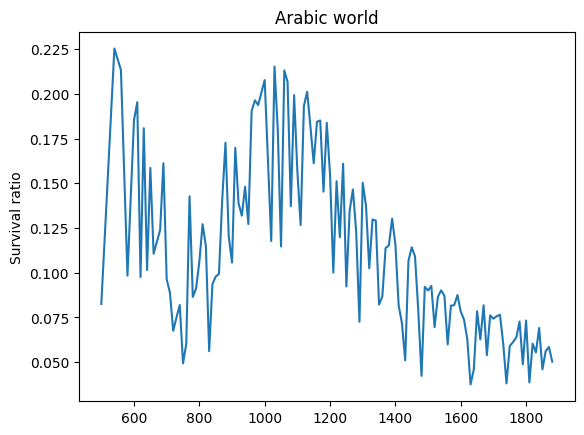

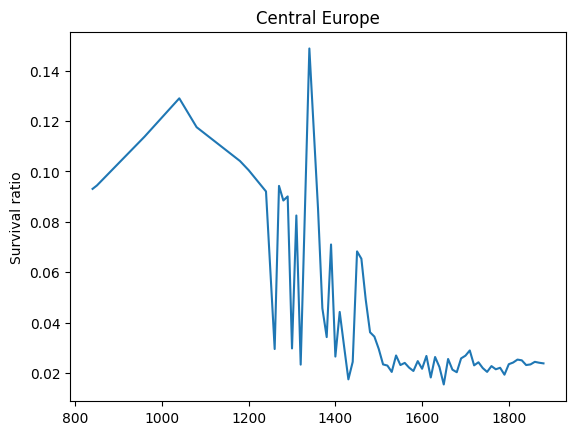

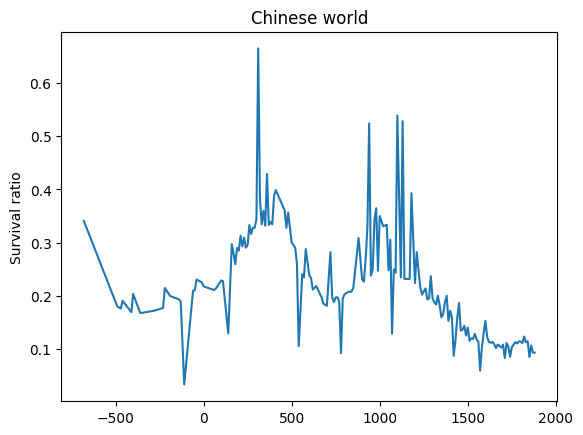

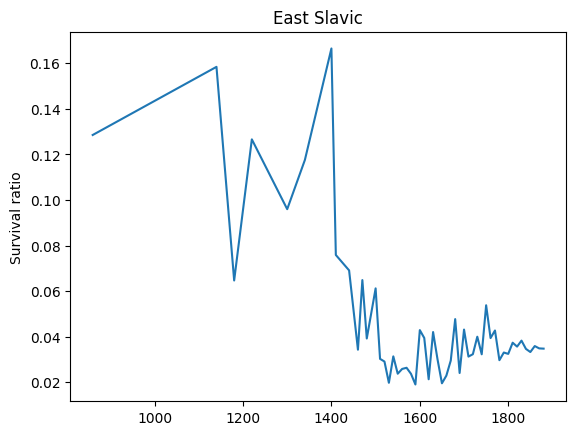

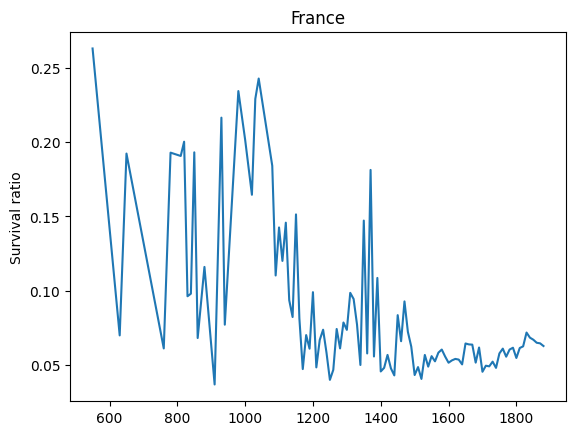

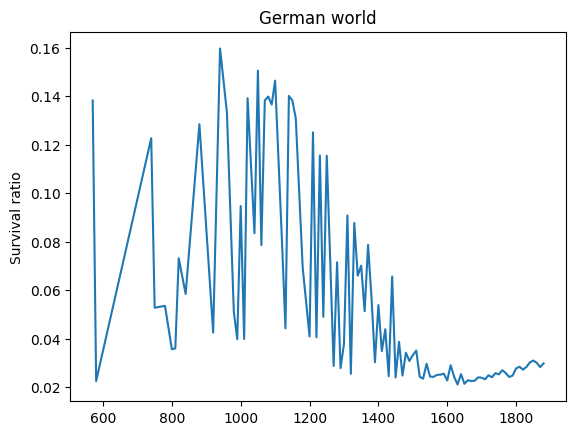

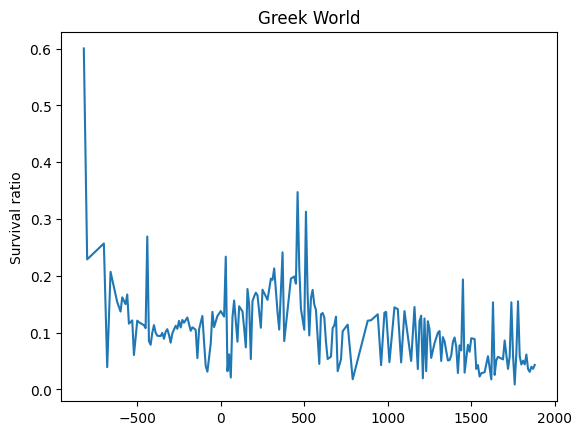

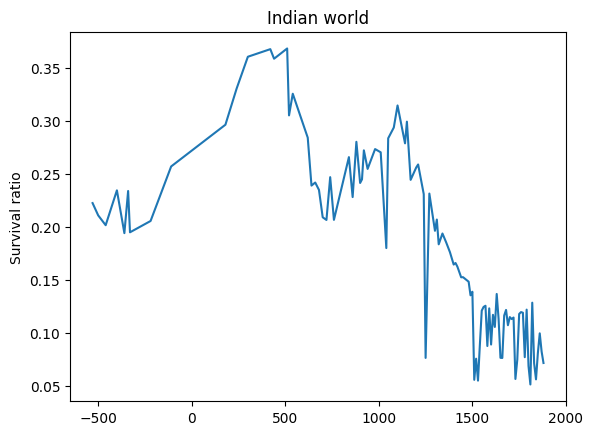

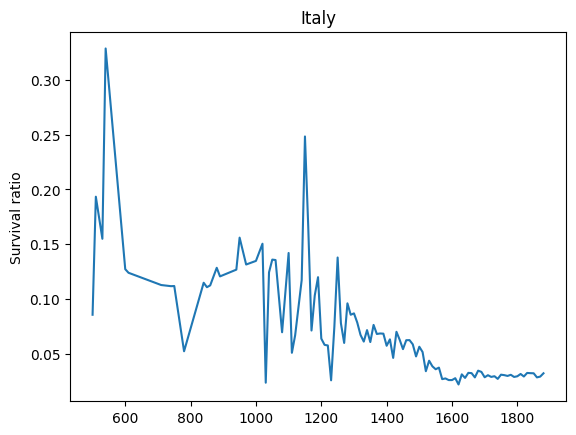

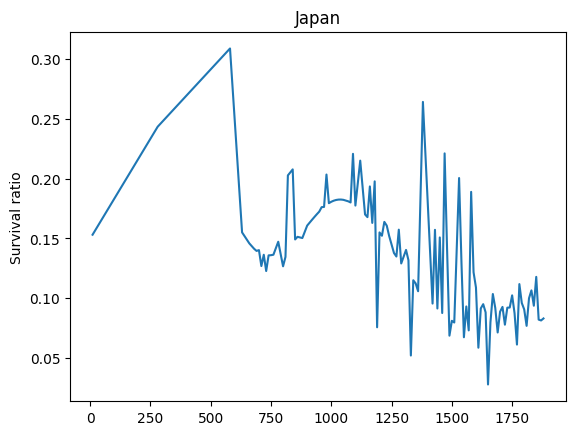

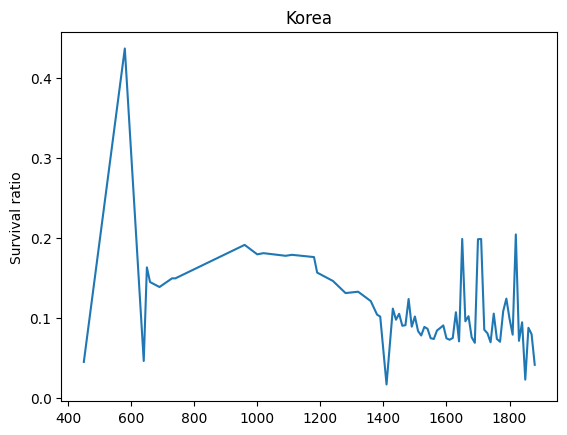

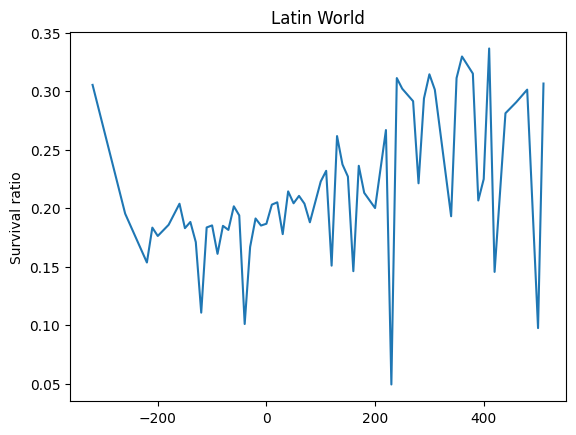

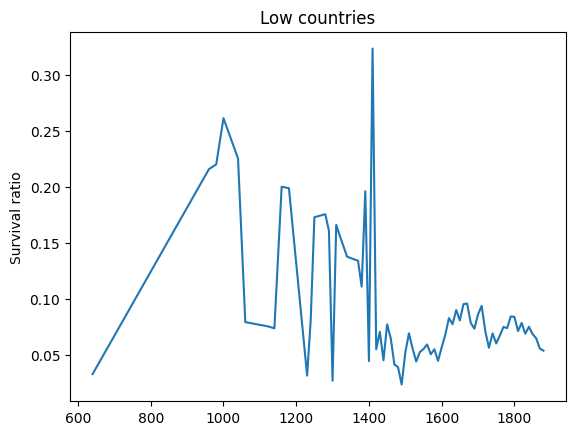

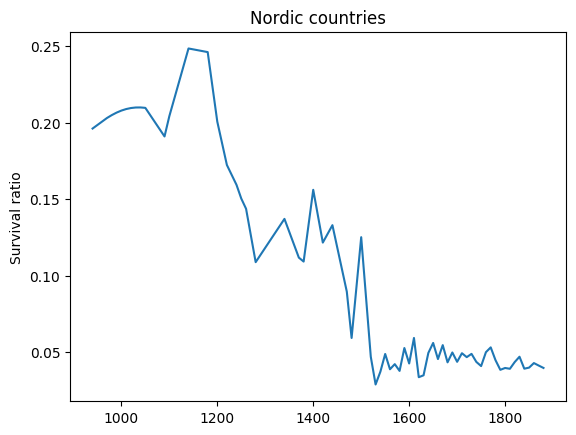

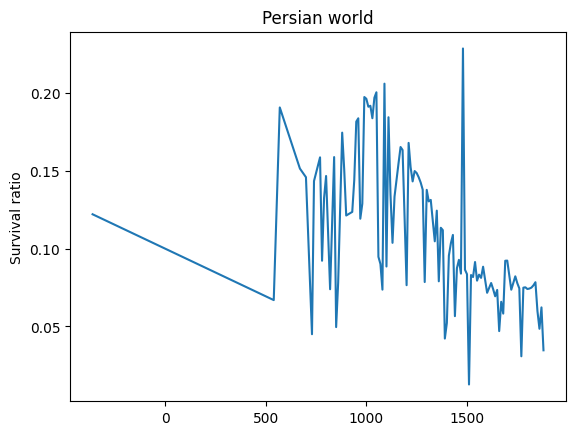

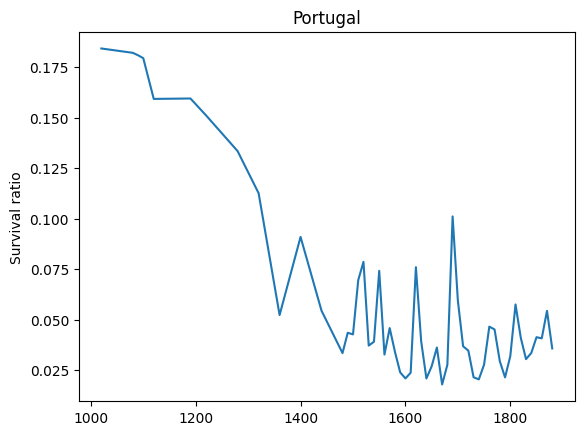

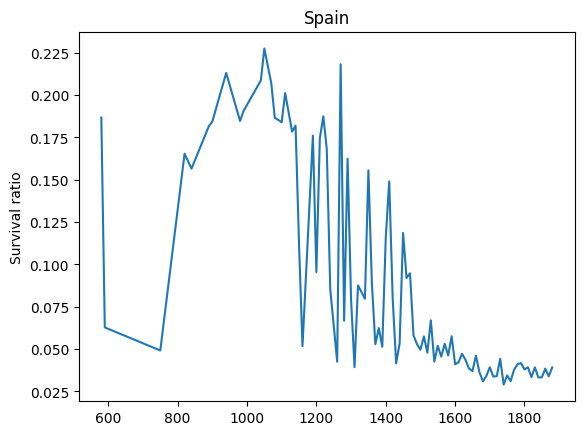

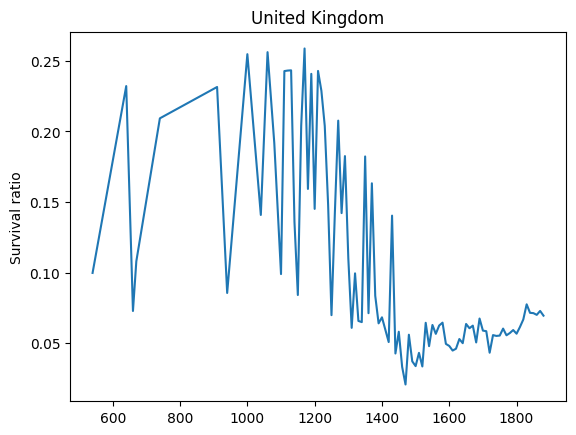

In [7]:

import matplotlib.pyplot as plt
import os

show = True

# Create the directory if it doesn't exist
directory = "survival_ratio_plots"
if not os.path.exists(directory):
    os.makedirs(directory)
    

grouped = df_cultura.groupby('region_name')

# Plot GDP per capita over time for each country
for name, group in grouped:
    plt.plot(group['decade'], group['survival_ratio'])
    plt.title(name)
    plt.ylabel('Survival ratio')
    plt.savefig(os.path.join(directory, f'{name}.png'))
    # Show plot
    if show:
        plt.show()